# Part A. Planning

## 1. Title, Name and References

- Chiranjeev Sandhu
- Jimmy Nham
- Kamyar Ghasemi Ghasemvand
- Mateus Abdallah Fonseca, 300357823

### References
* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://www.datacamp.com/tutorial/text-analytics-beginners-nltk
* https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

## 2. Planning

- This project will analyze the following dataset to do some classification. To do this we are going to use some libraries such as pandas, scikit-learn, and statistics models.

# Part B. Basic Model

## 1. Library import and data loading

In [36]:
import pandas as pd
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import _stop_words

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

In [3]:
train_df = pd.read_csv("climate_data/climate_train.csv")
train_df

,Unnamed: 0,text,label
0,0,− Scope 3: Optional scope that includes indire...,0
1,1,The Group is not aware of any noise pollution ...,0
2,2,Global climate change could exacerbate certain...,0
3,3,Setting an investment horizon is part and parc...,1
4,4,Climate change the physical impacts of climate...,0
...,...,...,...
995,995,Greenhouse gas Mitigation Measures Our five ye...,1
996,996,We have updated our external sector statements...,1
997,997,STOREBRAND'S USE Task Force on Climate-related...,0
998,998,Estimations of nanced emissions indicate the i...,0


In [4]:
test_df = pd.read_csv("climate_data/climate_test.csv")
test_df

,Unnamed: 0,text,label
0,0,Sustainable strategy ‘red lines’ For our susta...,1
1,1,"Verizon’s environmental, health and safety man...",0
2,2,"In 2019, the Company closed a series of transa...",1
3,3,"In December 2020, the AUC approved the Electri...",0
4,4,"Finally, there is a reputational risk linked t...",0
...,...,...,...
315,315,Indirect emissions result from operational act...,0
316,316,"All data in this TCFD report is as of, or for ...",0
317,317,Outcome: The bank explained that it would be w...,1
318,318,"In 2020, Banco do Brasil Foundation celebrated...",1


## 2. Data exploration, pre-processing and cleansing
- i.  to explore the dataset 
- ii. convert labels to number if necessary 
- iii. to pre-process the dataset by removing digits, stopwords

In [17]:
print('Train set')
print(train_df.isna().sum(), '\n')
print('Test set')
print(test_df.isna().sum())

Train set
Unnamed: 0    0
text          0
label         0
dtype: int64 

Test set
Unnamed: 0    0
text          0
label         0
dtype: int64


In [18]:
(train_df["text"].iloc[6])

'We emitted 13.4 million tonnes CO2 of Scope 2 (indirect emissions), being emissions arising from our consumption of purchased electricity, steam or heat. Our Scope 3 emissions include emissions from a broad range of sources, including shipping and land transportation. More details on our Scope 3 emissions will be available in our 2014'

<Axes: >

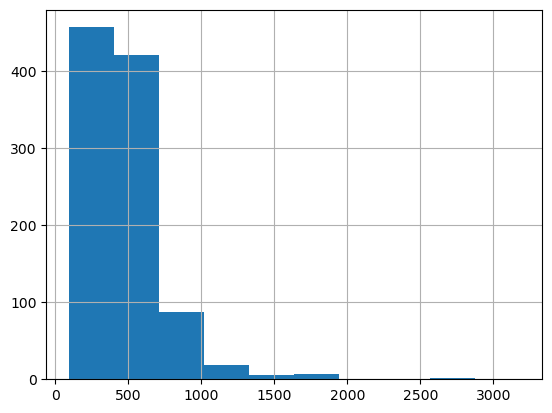

In [13]:
# Following histogram shows that text range from 100 to 3000 characters, 
# and in most of the case it is between 100 to 600 characters


train_df["text"].str.len().hist()


<Axes: >

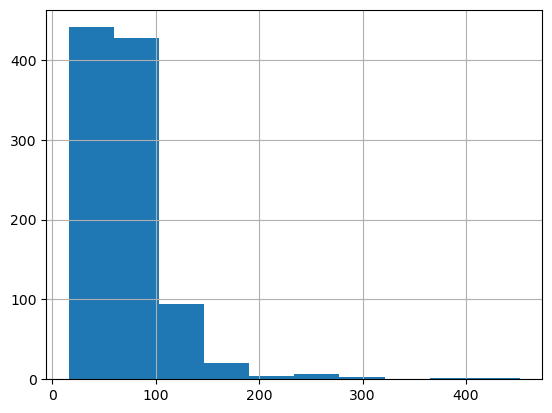

In [14]:
# This histogram shows the number of words. It ranges from 20 to 400 words and 
# mostly falls between 50 to 100 words.

train_df["text"].str.split().map(lambda x: len(x)).hist()

In [22]:
# Explore the dataset
display(train_df.shape)
train_df['label'].value_counts()/train_df.shape[0]

(1000, 3)

label
0    0.575
1    0.425
Name: count, dtype: float64

### The dataset appears to be quite balanced. The labels are already in numbers. It is not neccessary to convert them to numbers

In [23]:
# use only the text and label columns for the classification

train_df = train_df[['text','label']]
X_train = train_df.text
y_train = train_df.label

print(train_df.shape)

test_data = test_df[['text','label']]
X_test = test_df.text
y_test = test_df.label
print(test_df.shape)



(1000, 2)
(320, 3)


In [24]:
# digits and stopwords removal function

stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    return doc


## 3. Feature generation

- In this step, use TF-IDF to represent each data in both training set and test set

In [25]:
# apply tokenization and clean the text

vect = TfidfVectorizer(preprocessor=clean)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

### 4. Model building

- Use Naïve Bayes (Multinominal) Model to train a model.

In [30]:
# Naive Bayes Model

nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)
nb_pred = nb.predict(X_test_dtm)

CPU times: user 10.8 ms, sys: 29 μs, total: 10.8 ms
Wall time: 12.7 ms


### 5. Testing and evaluation

- Test the model in test set
- Use suitable metrics to evaluate the performance of the model


In [31]:
print("NB\n",classification_report(y_test, nb_pred))

NB
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       222
           1       0.70      0.53      0.60        98

    accuracy                           0.79       320
   macro avg       0.76      0.72      0.73       320
weighted avg       0.78      0.79      0.78       320



### 6. Post analysis

Research on how to identify the most impactful features (tokens) to classify climate action 
statement.


- Selecting the appropriate features for the model is essential step. Some techniques are use to calculates a score for all the input features.
- Those scores represents the importance of each feature. The higher scores usually stay and the lower scores are deleted.
- Correlation matrix allows you to understand the relationship between the features and the target. Also identify irrelevant features.
  


# Part C. Comparison with other models

## 1. Classifier comparison
i. Using the same features you found in Step 3 of Part A, training different classifiers: 
* Logistic Regression,
* Linear SVM,
* K-Nearest-Neighbour (You need to research on how to do this).
  
ii. Evaluate these models in test set\
iii. Compare the performance and make a conclusions

In [32]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
logreg_pred = logreg.predict(X_test_dtm)


In [33]:
print("Logistic Regression\n",classification_report(y_test, logreg_pred))

Logistic Regression
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       222
           1       0.67      0.55      0.60        98

    accuracy                           0.78       320
   macro avg       0.74      0.71      0.72       320
weighted avg       0.77      0.78      0.77       320



In [34]:
df_Tfidf_scores = pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names_out())
token_scores = df_Tfidf_scores.sum(axis=0)

# Select the top 10 tokens with the highest scores
top_10_tokens = token_scores.nlargest(10)
top_10_tokens

token_scores

ABC             0.224263
ABN             0.483365
ABP             0.525772
ABR             0.215304
ABS             0.130948
                  ...   
zerocarbon      0.253700
zeroemission    0.208616
zloty           0.179913
zones           0.252988
ºC              0.122238
Length: 7322, dtype: float64

In [37]:
# Linear SVM
svm = LinearSVC(class_weight="balanced")
svm.fit(X_train_dtm, y_train)

y_pred_class = svm.predict(X_test_dtm)

print(classification_report(y_test, y_pred_class))
print('Accuracy: ', accuracy_score(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       222
           1       0.60      0.71      0.65        98

    accuracy                           0.77       320
   macro avg       0.73      0.75      0.74       320
weighted avg       0.78      0.77      0.77       320

Accuracy:  0.76875
